In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [4]:
dataset_train = pd.read_csv(r'C:\Users\Umesh\Documents\JupyterNotebook\google stock price prediction\trainset.csv')

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/25/2015,534.432739,544.724487,533.978943,542.380920,542.380920,1825900
1,2/26/2015,541.722717,554.617310,540.017395,553.959106,553.959106,2311500
2,2/27/2015,552.722473,563.163818,551.386169,556.871094,556.871094,2410100
3,3/2/2015,558.995300,570.583435,557.220154,569.775696,569.775696,2129600
4,3/3/2015,568.888123,573.814575,564.968872,572.069397,572.069397,1704700


In [6]:
train_set = dataset_train.iloc[:,1:2].values

In [7]:
train_set

array([[ 534.432739],
       [ 541.722717],
       [ 552.722473],
       ...,
       [1522.      ],
       [1508.030029],
       [1426.109985]])

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [15]:
training_set_scaled

array([[0.01485003],
       [0.02209962],
       [0.03303845],
       ...,
       [0.99694706],
       [0.98305447],
       [0.90158819]])

In [16]:
x_train = []
y_train = []

In [19]:
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
#Reshaping
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) 

In [21]:
#Building the RNN
#Import the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
model = Sequential()
#Adding the first LSTM layer and add dropout regularization
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
#Adding the second LSTM layer and add dropout regularization
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
#Adding the third LSTM layer and add dropout regularization
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
#Adding the fourth LSTM layer and add dropout regularization
model.add(LSTM(units=50))
model.add(Dropout(0.2))
#Adding the output layer
model.add(Dense(units=1))

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
3594/3594 [==============================] - 18s 5ms/step - loss: 0.0140
Epoch 2/100
3594/3594 [==============================] - 12s 3ms/step - loss: 0.0039
Epoch 3/100
3594/3594 [==============================] - 12s 3ms/step - loss: 0.0034
Epoch 4/100
3594/3594 [==============================] - 13s 3ms/step - loss: 0.0032
Epoch 5/100
3594/3594 [==============================] - 14s 4ms/step - loss: 0.0029
Epoch 6/100
3594/3594 [==============================] - 14s 4ms/step - loss: 0.0029
Epoch 7/100
3594/3594 [==============================] - 14s 4ms/step - loss: 0.0026
Epoch 8/100
3594/3594 [==============================] - 15s 4ms/step - loss: 0.0027
Epoch 9/100
3594/3594 [==============================] - 13s 4ms/step - loss: 0.0024
Epoch 10/100
3594/3594 [==============================] - 13s 4ms/step - loss: 0.0024
Epoch 11/100
3594/3594 [==============================] - 13s 3ms/step - loss: 0.0022
Epoch 12/100
3594/3594 [==============================] - 13s 4

In [26]:
# Getting test dataset
test_dataset = pd.read_csv(r'C:\Users\Umesh\Documents\JupyterNotebook\google stock price prediction\testset_1.csv')

In [28]:
# Getting real stock price of 2020 
real_stock_price = test_dataset.iloc[:,1:2].values

In [29]:
# predicted stock price of 2020
dataset_total=pd.concat((dataset_train['Open'],test_dataset['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(test_dataset)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [30]:
X_test=[]
for i in range(60,81):
  X_test.append(inputs[i-60:i,0])

X_test=np.array(X_test)  

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [32]:
predicted_stock_price=model.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

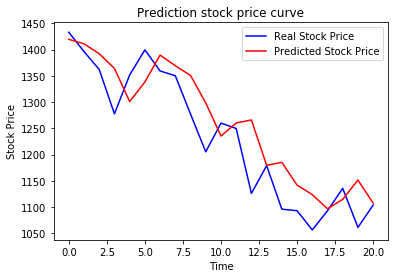

In [41]:
#Visualising the result
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Prediction stock price curve')
plt.savefig('Google_Stock_Price_Predictionr.png')
plt.show()